In [ ]:
#Price Optimization & Revenue Impact Analysis
#This project analyzes how price changes impact product demand and revenue using real-world retail transaction data.
#The goal is to simulate pricing scenarios and identify an optimal price point to maximize revenue.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/Online Retail.csv")

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.shape, df.columns


((541909, 8),
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
        'UnitPrice', 'CustomerID', 'Country'],
       dtype='object'))

In [4]:
# Remove cancelled transactions (negative quantities)
df = df[df['Quantity'] > 0]

# Remove rows with zero or negative price
df = df[df['UnitPrice'] > 0]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
## Assumptions
#Customer demand responds proportionally to price changes.
#Cost and external factors (promotions, competitors) are not considered.
#Analysis is based on historical transaction data.


In [5]:
product_sales = (
    df.groupby('StockCode')
    .agg(
        avg_price=('UnitPrice', 'mean'),
        total_quantity=('Quantity', 'sum'),
        total_revenue=('Revenue', 'sum')
    )
    .reset_index()
)

product_sales.head()


,StockCode,avg_price,total_quantity,total_revenue
0,10002,1.086620,860,759.89
1,10080,0.410909,303,119.09
2,10120,0.210000,193,40.53
3,10123C,0.650000,5,3.25
4,10124A,0.420000,16,6.72


In [6]:
# Remove products with very low sales (noise)
product_sales = product_sales[product_sales['total_quantity'] > 50]

product_sales.shape


(2977, 4)

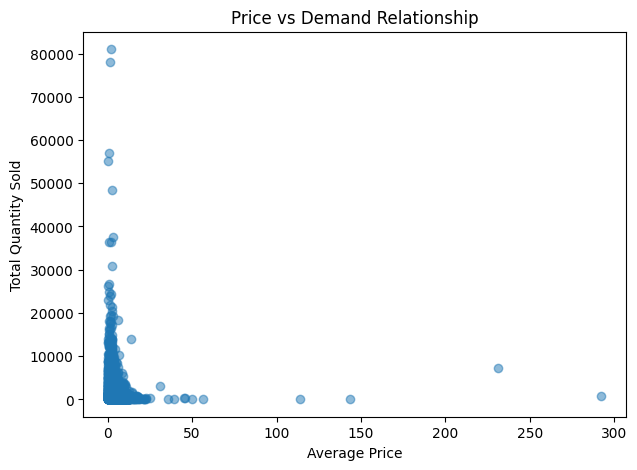

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(product_sales['avg_price'], product_sales['total_quantity'], alpha=0.5)
plt.xlabel("Average Price")
plt.ylabel("Total Quantity Sold")
plt.title("Price vs Demand Relationship")
plt.show()


In [8]:
# Log-log model for elasticity
# Elasticity = % change in demand / % change in price

product_sales['log_price'] = np.log(product_sales['avg_price'])
product_sales['log_quantity'] = np.log(product_sales['total_quantity'])

# Simple linear regression using numpy
coefficients = np.polyfit(
    product_sales['log_price'],
    product_sales['log_quantity'],
    1
)

elasticity = coefficients[0]
elasticity


np.float64(-0.4180941262664678)

In [9]:
price_changes = np.linspace(-0.3, 0.3, 20)

simulated_revenue = []

for change in price_changes:
    new_price = product_sales['avg_price'] * (1 + change)

    # Demand response using elasticity
    new_quantity = product_sales['total_quantity'] * (1 + change) ** elasticity

    revenue = (new_price * new_quantity).sum()
    simulated_revenue.append(revenue)


In [10]:
optimal_change = price_changes[np.argmax(simulated_revenue)]

optimal_change



np.float64(0.3)

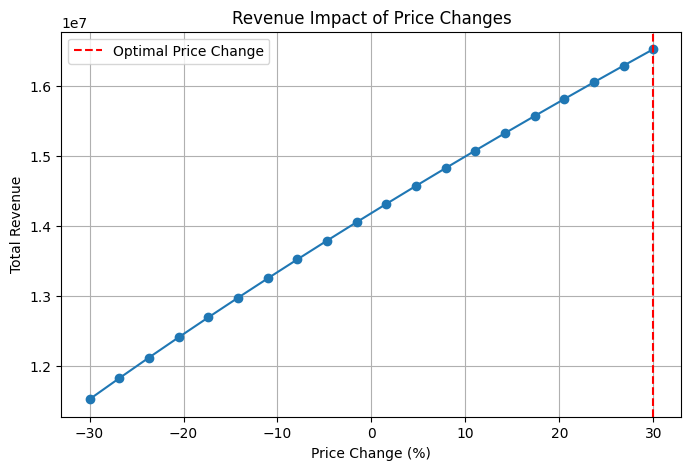

In [12]:
plt.figure(figsize=(8,5))
plt.plot(price_changes * 100, simulated_revenue, marker='o')
plt.axvline(optimal_change * 100, color='red', linestyle='--', label='Optimal Price Change')
plt.xlabel("Price Change (%)")
plt.ylabel("Total Revenue")
plt.title("Revenue Impact of Price Changes")
plt.legend()
plt.grid(True)
plt.show()


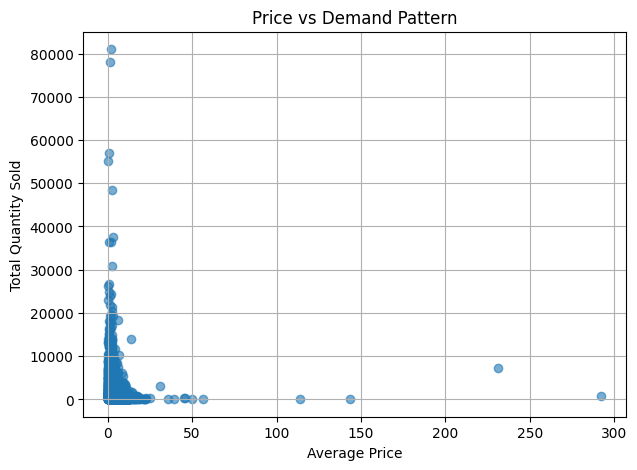

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(product_sales['avg_price'], product_sales['total_quantity'], alpha=0.6)
plt.xlabel("Average Price")
plt.ylabel("Total Quantity Sold")
plt.title("Price vs Demand Pattern")
plt.grid(True)
plt.show()


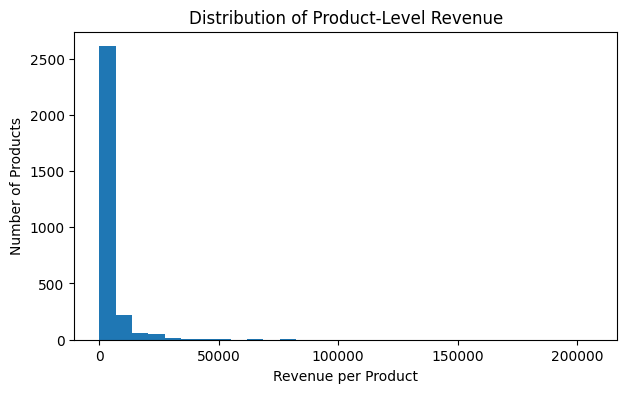

In [15]:
plt.figure(figsize=(7,4))
plt.hist(product_sales['total_revenue'], bins=30)
plt.xlabel("Revenue per Product")
plt.ylabel("Number of Products")
plt.title("Distribution of Product-Level Revenue")
plt.show()


In [ ]:
## Key Insights
# Revenue does not increase linearly with price.
# There exists an optimal price range that maximizes revenue.
# Data-driven pricing decisions can significantly improve business outcomes.
